In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset
df = pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**DATA PREPROCESSING**

In [5]:
df.shape

(10999, 12)

In [6]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [7]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

**DESCRIPTIVE STATISTICS**

In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**EXPLORATORY DATA ANALYSIS**

Text(0.5, 1.0, 'Gender Distribution')

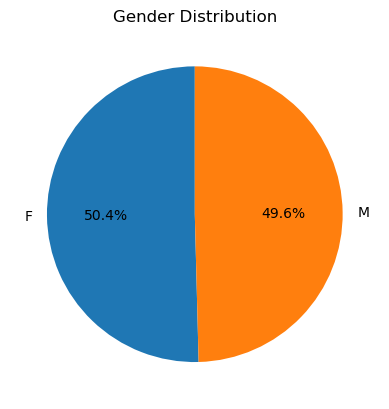

In [10]:
#customer gender description
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

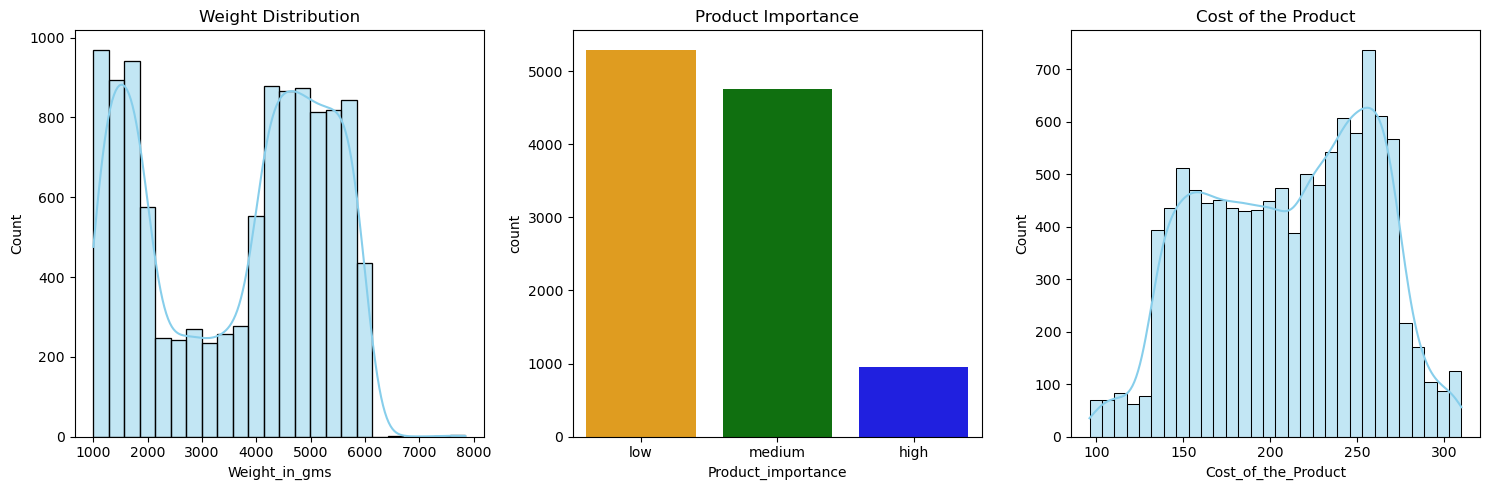

In [11]:
#product properties
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True, color='skyblue').set_title('Weight Distribution')
sns.countplot(
    x='Product_importance',
    hue='Product_importance',
    data=df,
    ax=ax[1],
    palette={'low': 'orange', 'medium': 'green', 'high': 'blue'}
).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True, color='skyblue').set_title('Cost of the Product')

plt.tight_layout()
plt.show()


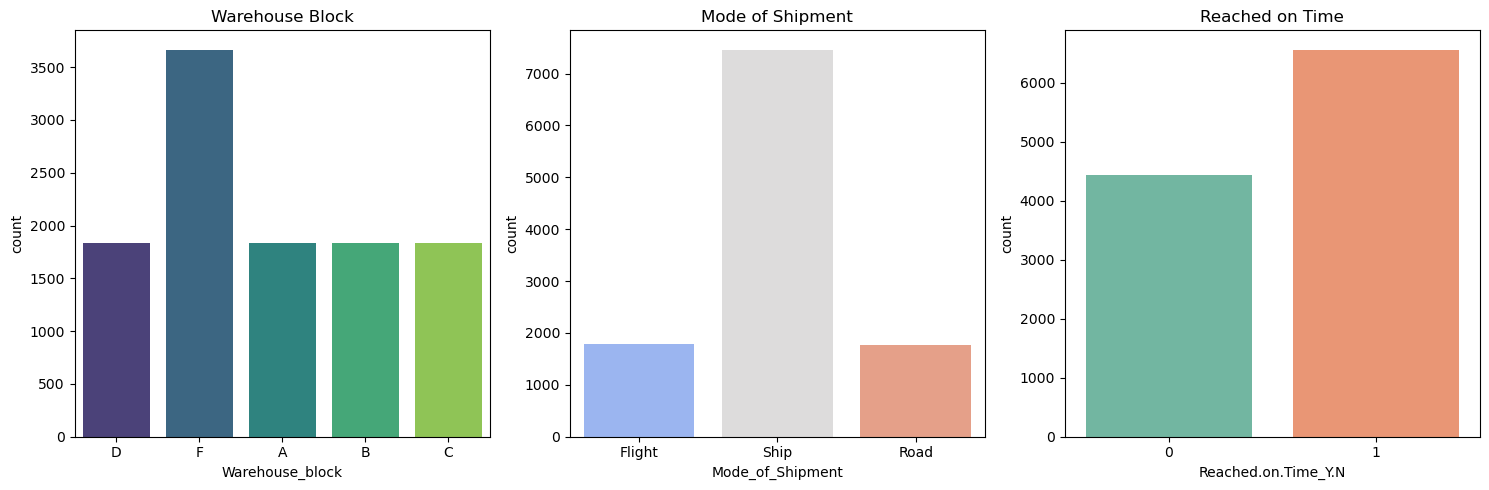

In [12]:
#logistics
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Warehouse_block', hue='Warehouse_block', data=df, ax=ax[0], palette='viridis', legend=False).set_title('Warehouse Block')
sns.countplot(x='Mode_of_Shipment', hue='Mode_of_Shipment', data=df, ax=ax[1], palette='coolwarm', legend=False).set_title('Mode of Shipment')
sns.countplot(x='Reached.on.Time_Y.N', hue='Reached.on.Time_Y.N', data=df, ax=ax[2], palette='Set2', legend=False).set_title('Reached on Time')

plt.tight_layout()
plt.show()


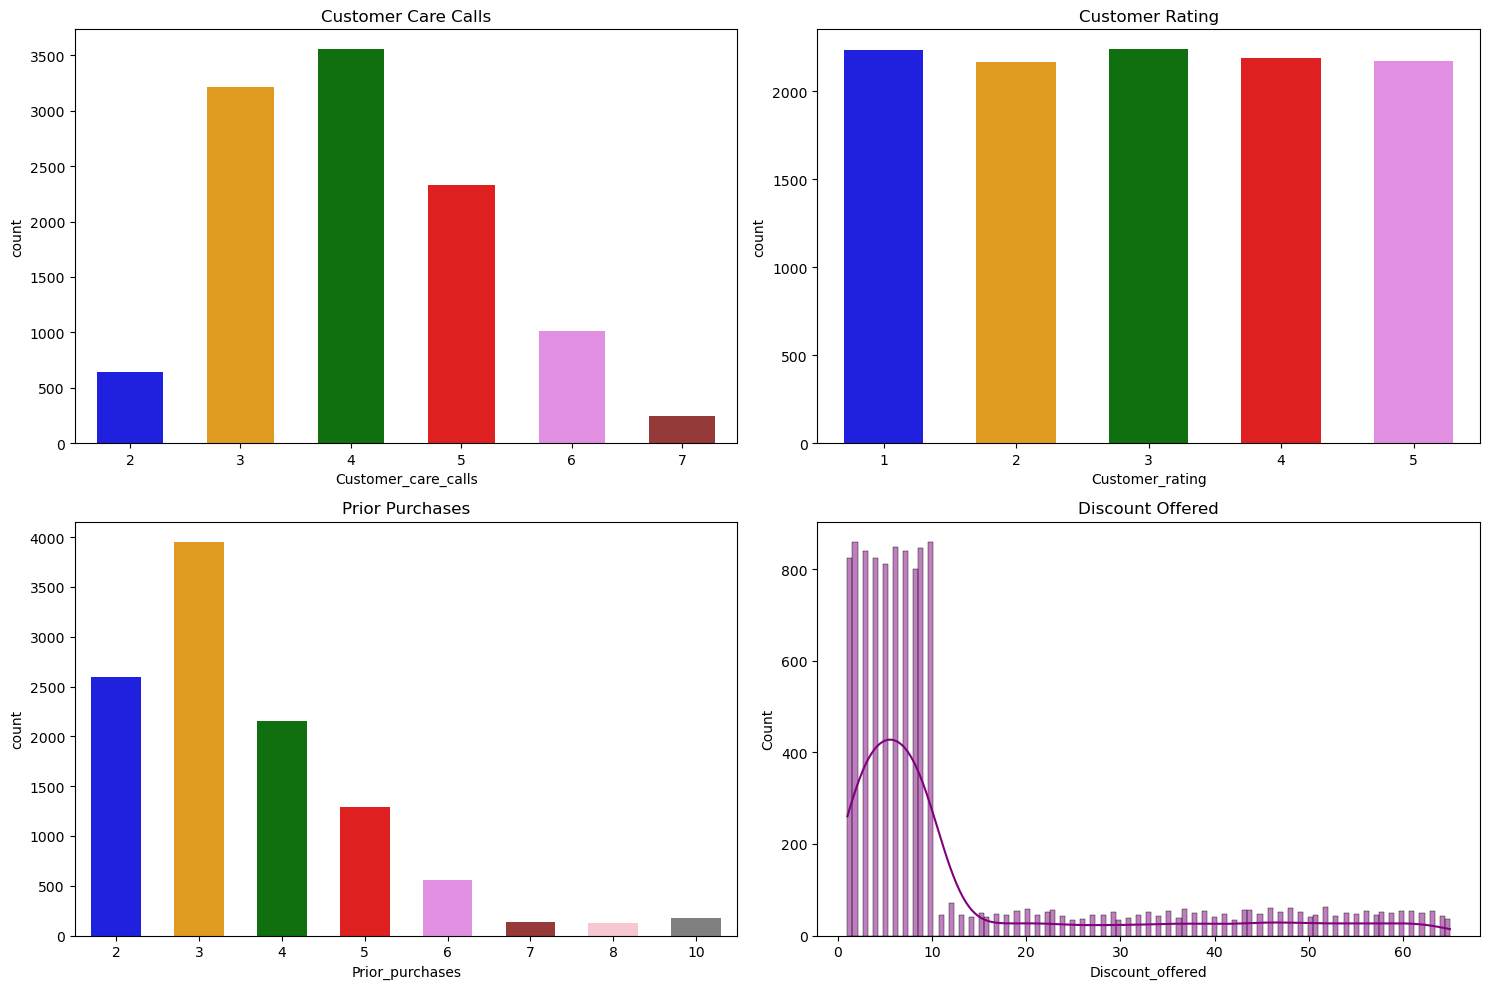

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
colors = ["blue", "orange", "green", "red", "violet", "brown", "pink", "gray"]
sns.countplot(x='Customer_care_calls', data=df, ax=ax[0,0], hue='Customer_care_calls', palette=sns.color_palette(colors[:df['Customer_care_calls'].nunique()]), legend=False, width=0.6).set_title('Customer Care Calls')
sns.countplot(x='Customer_rating', data=df, ax=ax[0,1], hue='Customer_rating', palette=sns.color_palette(colors[:df['Customer_rating'].nunique()]), legend=False, width=0.6).set_title('Customer Rating')
sns.countplot(x='Prior_purchases', data=df, ax=ax[1,0], hue='Prior_purchases', palette=sns.color_palette(colors[:df['Prior_purchases'].nunique()]), legend=False, width=0.6).set_title('Prior Purchases')
sns.histplot(x='Discount_offered', data=df, ax=ax[1,1], kde=True, color='purple').set_title('Discount Offered')
plt.tight_layout()
plt.show()

**Customer Gender and Product Delivery**

Text(0.5, 1.0, 'Gender vs Reached on Time')

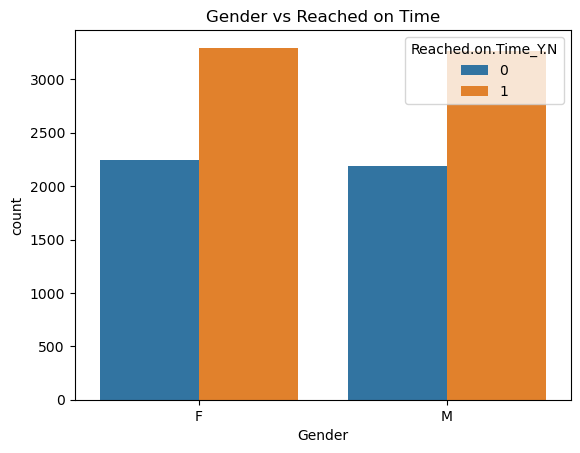

In [14]:
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

**Product Properties and Product Delivery**

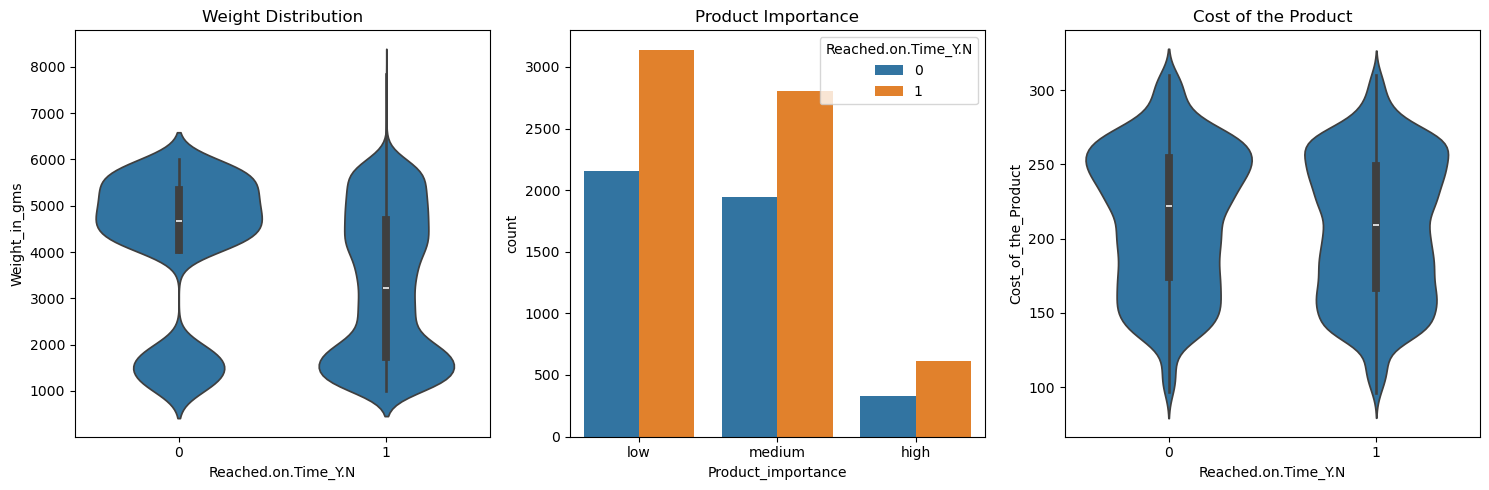

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(y=df['Weight_in_gms'], x=df['Reached.on.Time_Y.N'], ax=ax[0]).set_title('Weight Distribution')
sns.countplot(x='Product_importance', data=df, ax=ax[1], hue='Reached.on.Time_Y.N').set_title('Product Importance')
sns.violinplot(y=df['Cost_of_the_Product'], x=df['Reached.on.Time_Y.N'], ax=ax[2]).set_title('Cost of the Product')
plt.tight_layout()
plt.show()

**Logistics and Product Delivery**

Text(0.5, 1.0, 'Mode of Shipment')

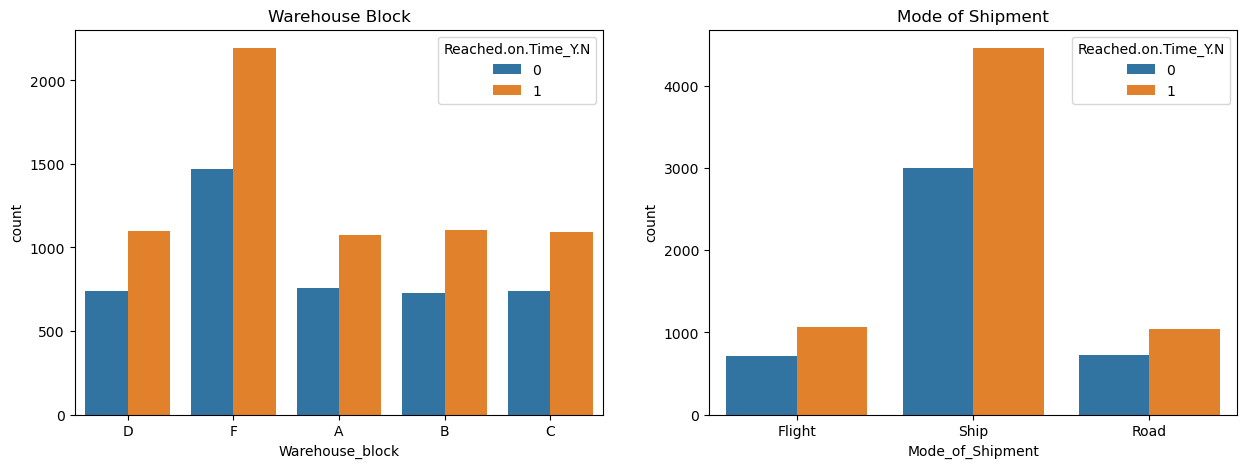

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

**Customer Experience and Product Delivery**

Text(0.5, 1.0, 'Discount Offered')

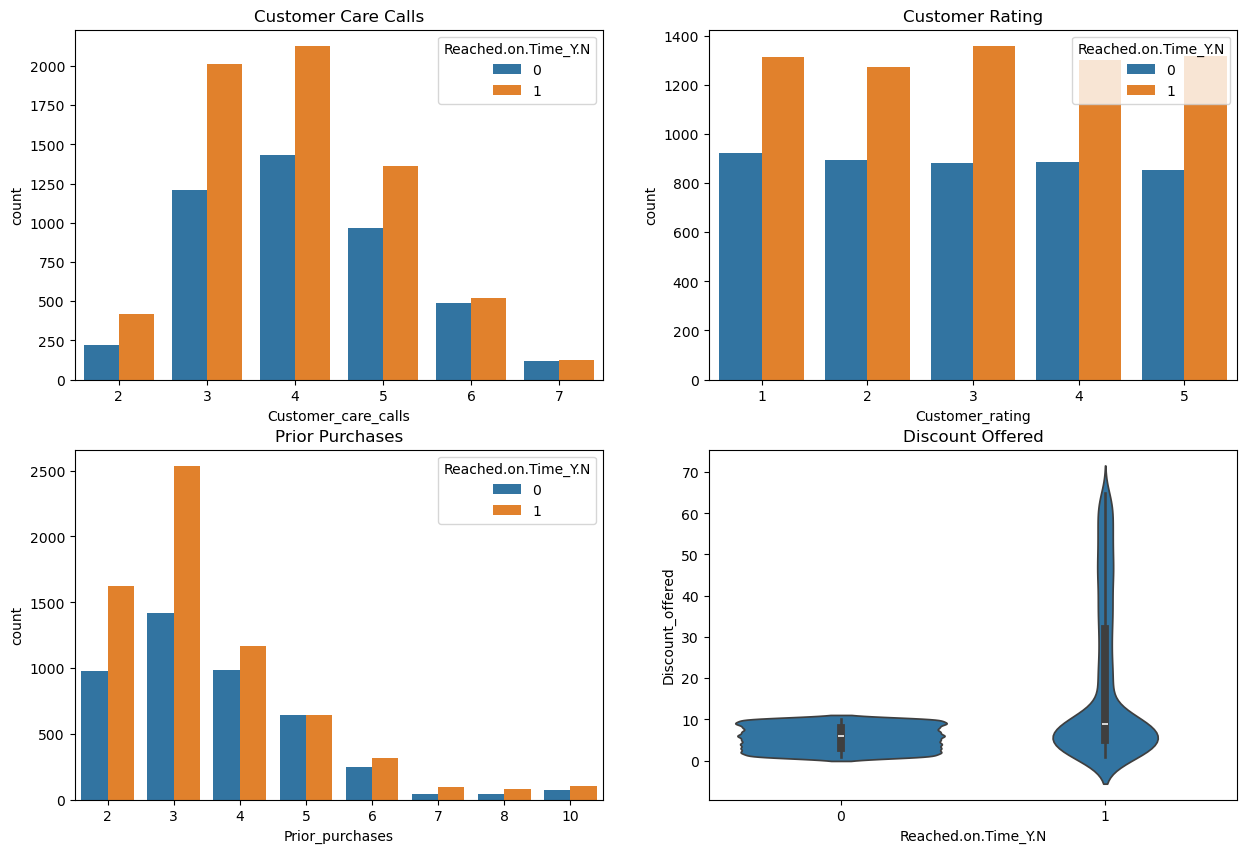

In [17]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

**DATA PREPROCESSING 2**

*Label Encoding the Categorical Variables*

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


**Correlation Matrix Heatmap**

<Axes: >

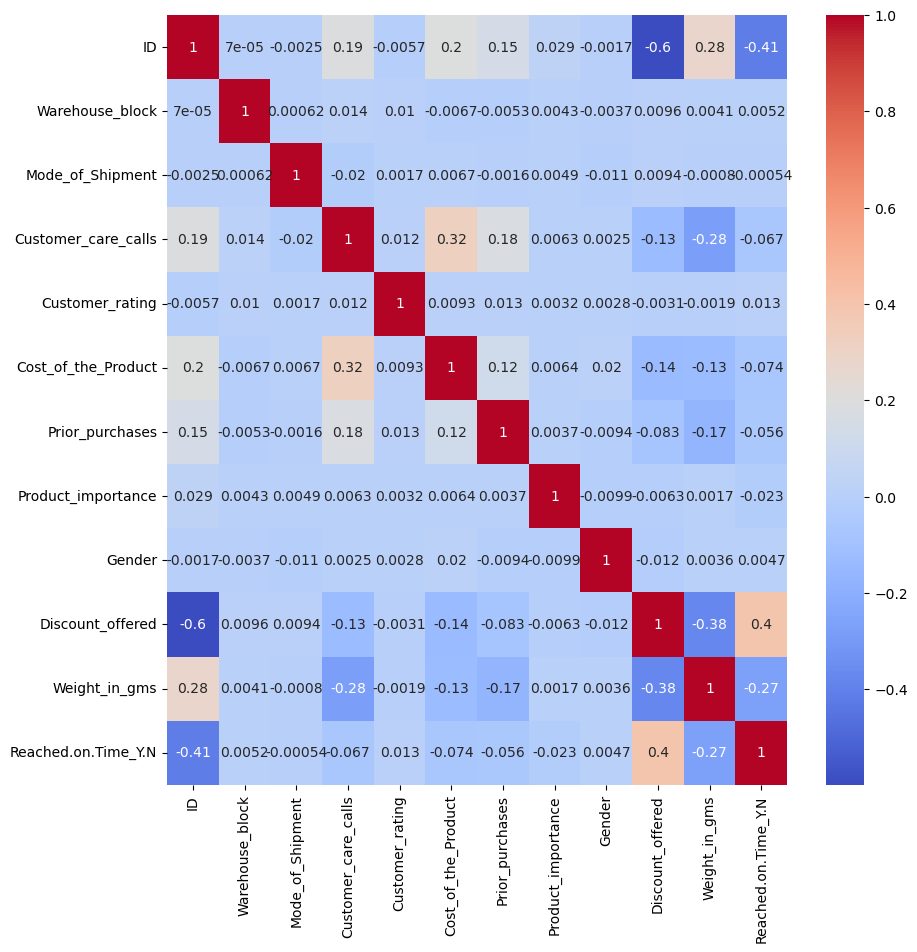

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

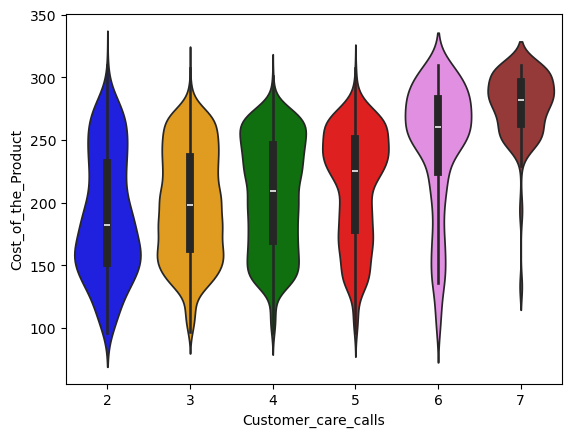

In [20]:
sns.violinplot(x='Customer_care_calls', y='Cost_of_the_Product', data=df, hue='Customer_care_calls', 
               palette=["blue", "orange", "green", "red", "violet", "brown"], legend=False)

**Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

**Model Building**

*1.Random Forest Classifier*

In [26]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [27]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification  # Using sample data for demonstration

# Create sample data (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
rfc = RandomForestClassifier(random_state=42)

# Reduced parameter grid for faster tuning
param_grid = {
    'max_depth': [8, 12, None],  # None for unlimited depth
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 4],
    'criterion': ['gini'],  # Removed entropy for speed (usually similar to gini)
    'n_estimators': [100]  # Fixed number of trees
}

# GridSearchCV with reduced parameters
grid = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid, 
                    cv=3,  # Reduced from 5 to 3 folds
                    n_jobs=-1, 
                    verbose=1,  # Lower verbosity
                    scoring='accuracy')

# Fit the model
grid.fit(X_train, y_train)

# Results
print('Best parameters: ', grid.best_params_)
print('Best score: ', grid.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.8850027690950221


In [28]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [29]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.93125


In [30]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)

**Decision Tree Classifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

In [32]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


C:\Users\queen\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [33]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [34]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.93875


In [35]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)

**Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

In [37]:
#fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
#Training accuracy
lr.score(X_train, y_train)

0.8825

In [39]:
#predicting the test set results
lr_pred = lr.predict(X_test)

**K Nearest Neighbors**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [41]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
#training accuracy
knn.score(X_train, y_train)


C:\Users\queen\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\queen\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\queen\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\queen\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\queen\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

0.885

In [43]:
#predicting the test set results
knn_pred = knn.predict(X_test)

**Model Evaluation**

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

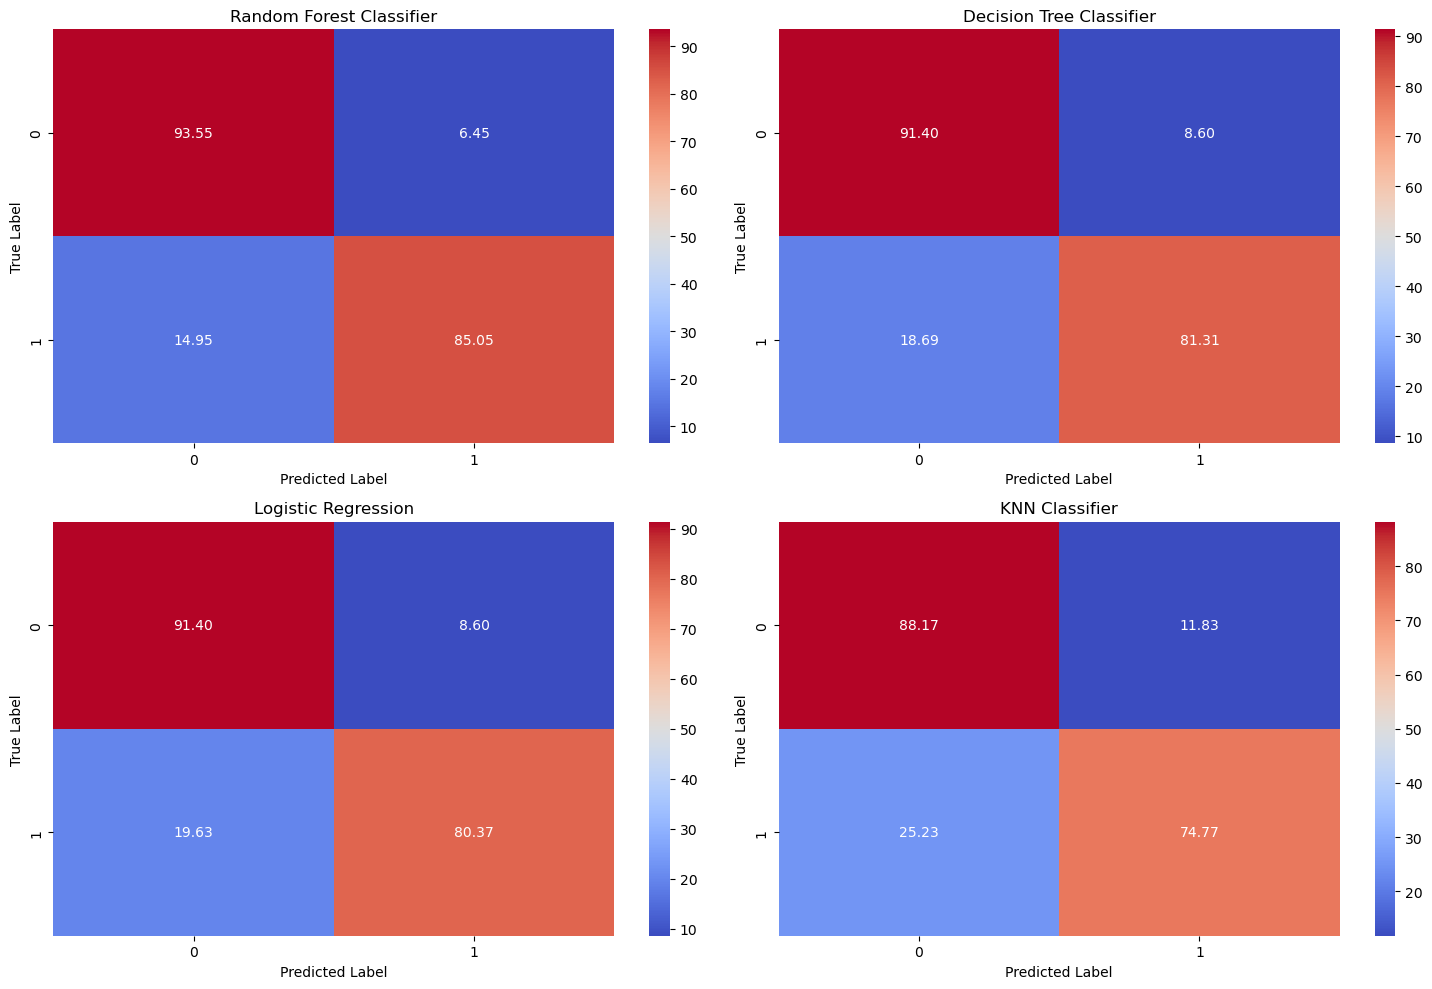

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to normalize confusion matrix (row-wise percentage)
def normalize_conf_matrix(cm):
    return (cm.astype(np.float64) / cm.sum(axis=1, keepdims=True)) * 100

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Compute and plot normalized confusion matrices
models = {
    "Random Forest Classifier": rfc_pred,
    "Decision Tree Classifier": dtc_pred,
    "Logistic Regression": lr_pred,
    "KNN Classifier": knn_pred
}

axes = [(0, 0), (0, 1), (1, 0), (1, 1)]

for (title, pred), pos in zip(models.items(), axes):
    cm = confusion_matrix(y_test, pred)
    cm_percent = normalize_conf_matrix(cm)
    
    sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="coolwarm", ax=ax[pos])
    ax[pos].set_title(title)
    ax[pos].set_xlabel("Predicted Label")
    ax[pos].set_ylabel("True Label")

plt.tight_layout()
plt.show()


In [46]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        93
           1       0.94      0.85      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        93
           1       0.92      0.81      0.86       107

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85      

**Model Comparison**

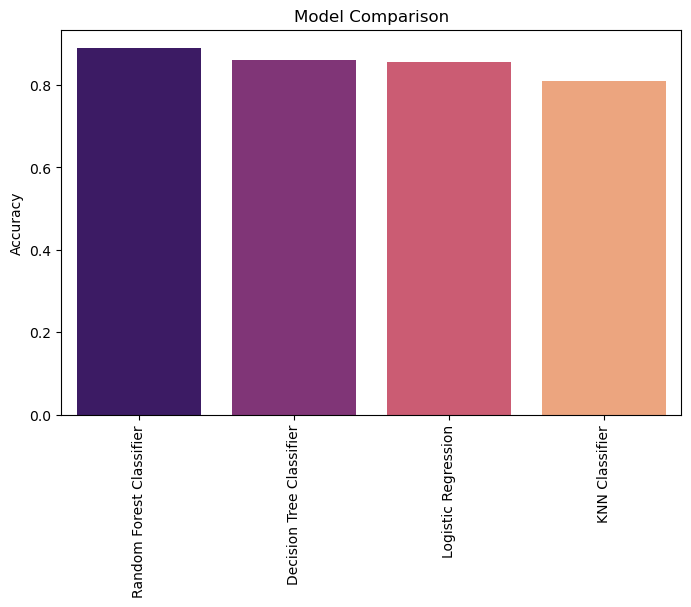

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracy, hue=models, dodge=False, palette='magma')
plt.title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.legend([],[], frameon=False)  

plt.show()

**Deep Learning Implementation**

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


**DEEP LEARNING - FEED FORWARD NEURAL NETWORK**

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

C:\Users\queen\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6204 - loss: 0.5933 - val_accuracy: 0.6784 - val_loss: 0.5124
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6530 - loss: 0.5337 - val_accuracy: 0.6778 - val_loss: 0.5158
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6603 - loss: 0.5256 - val_accuracy: 0.6801 - val_loss: 0.5117
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6642 - loss: 0.5257 - val_accuracy: 0.6773 - val_loss: 0.5125
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6602 - loss: 0.5249 - val_accuracy: 0.6795 - val_loss: 0.5118
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6654 - loss: 0.5205 - val_accuracy: 0.6801 - val_loss: 0.5117
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6638 - loss: 0.5202 - val_accuracy: 0.6830 - val_loss: 0.5096
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6608 - loss: 0.5244 - val_accuracy: 0.

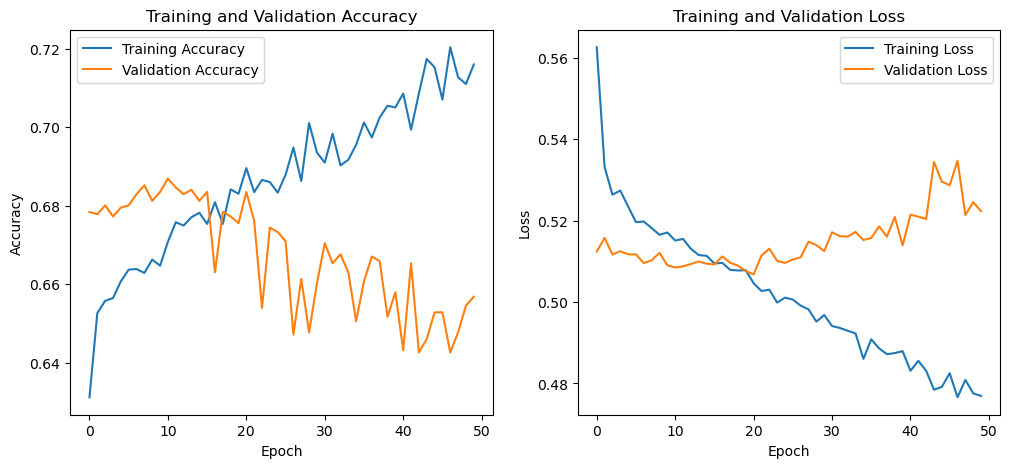

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset (replace 'E_Commerce.csv' with your file path)
df = pd.read_csv('E_Commerce.csv')

# Display first few rows
print(df.head())

# Separate features and target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Identify categorical and numerical columns
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build a Deep Learning Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix and classification report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
pip install tf-keras


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 1.9 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 1.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 1.6 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.5 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
print(delivery_data.columns)


Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


C:\Users\queen\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5977 - loss: 0.6365 - val_accuracy: 0.6455 - val_loss: 0.5385
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6601 - loss: 0.5434 - val_accuracy: 0.6523 - val_loss: 0.5226
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6511 - loss: 0.5413 - val_accuracy: 0.6352 - val_loss: 0.5203
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6551 - loss: 0.5288 - val_accuracy: 0.6477 - val_loss: 0.5191
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6686 - loss: 0.5285 - val_accuracy: 0.6602 - val_loss: 0.5174
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6658 - loss: 0.5238 - val_accuracy: 0.6511 - val_loss: 0.5175
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6723 - loss: 0.5189 - val_accuracy: 0.6500 - val_loss: 0.5155
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6660 - loss: 0.5187 - val_acc

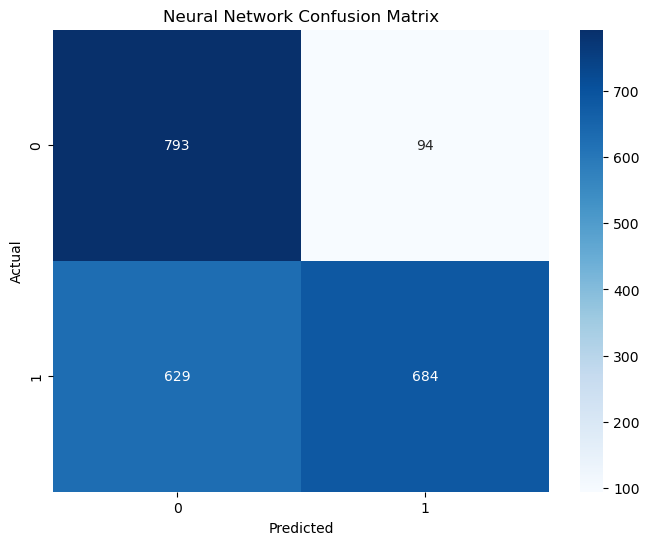

NameError: name 'rfc_pred' is not defined

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('E_Commerce.csv')

# Separate target variable
y = df['Reached.on.Time_Y.N'].astype(int)
X = df.drop('Reached.on.Time_Y.N', axis=1)

# Identify categorical and numerical features
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to numpy arrays for TensorFlow
X_train_processed = X_train_processed.astype('float32')
X_test_processed = X_test_processed.astype('float32')
y_train = y_train.values.astype('float32').reshape(-1, 1)
y_test = y_test.values.astype('float32').reshape(-1, 1)

# Define the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_processed, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
nn_pred_prob = model.predict(X_test_processed)
nn_pred = (nn_pred_prob > 0.5).astype(int)

# Print classification report and confusion matrix
print('Neural Network Classification Report:')
print(classification_report(y_test, nn_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, nn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Comparison (adding Neural Network)
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier', 'Neural Network']
accuracy_scores = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred), accuracy]
sns.barplot(x=models, y=accuracy_scores, palette='viridis').set_title('Model Comparison with Neural Network')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

C:\Users\queen\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5896 - loss: 0.6355 - val_accuracy: 0.6284 - val_loss: 0.5388
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6414 - loss: 0.5580 - val_accuracy: 0.6386 - val_loss: 0.5255
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6592 - loss: 0.5382 - val_accuracy: 0.6500 - val_loss: 0.5196
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6474 - loss: 0.5366 - val_accuracy: 0.6523 - val_loss: 0.5174
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6643 - loss: 0.5271 - val_accuracy: 0.6511 - val_loss: 0.5157
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6655 - loss: 0.5285 - val_accuracy: 0.6625 - val_loss: 0.5152
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6572 - loss: 0.5253 - val_accuracy: 0.6636 - val_loss: 0.5153
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6680 - loss: 0.5274 - val_

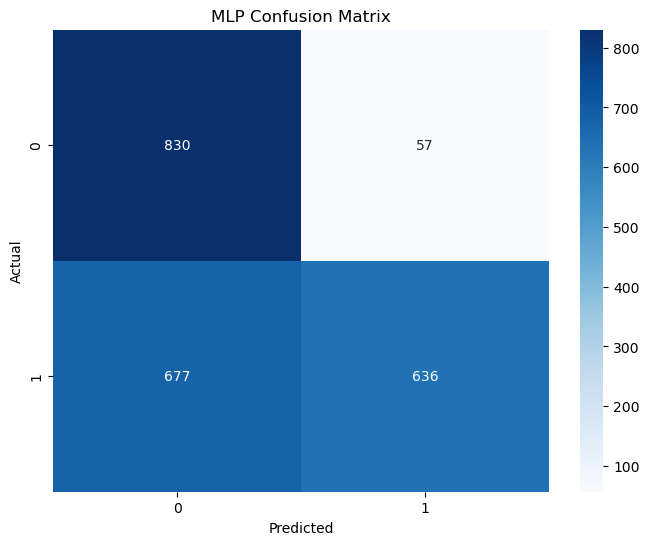

NameError: name 'rfc_pred' is not defined

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('E_Commerce.csv')

# Separate target variable
y = df['Reached.on.Time_Y.N'].astype(int)
X = df.drop('Reached.on.Time_Y.N', axis=1)

# Identify categorical and numerical features
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to numpy arrays for TensorFlow
X_train_processed = X_train_processed.astype('float32')
X_test_processed = X_test_processed.astype('float32')
y_train = y_train.values.astype('float32').reshape(-1, 1)
y_test = y_test.values.astype('float32').reshape(-1, 1)

# Define the Neural Network (MLP) model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train_processed, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test_processed, y_test, verbose=0)
print(f'MLP Test Accuracy: {mlp_accuracy:.4f}')

# Make predictions
mlp_pred_prob = mlp_model.predict(X_test_processed)
mlp_pred = (mlp_pred_prob > 0.5).astype(int)

# Print classification report and confusion matrix
print('MLP Classification Report:')
print(classification_report(y_test, mlp_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True, fmt='d', cmap='Blues')
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Comparison (adding MLP)
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN', 'MLP']
accuracy_scores = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred), mlp_accuracy]
sns.barplot(x=models, y=accuracy_scores, palette='viridis').set_title('Model Comparison with MLP')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

**MODEL COMPARISON**

Training traditional models...


  File "C:\Users\queen\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\queen\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\queen\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\queen\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



Training deep learning model...

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6154 - loss: 0.6081 - val_accuracy: 0.6778 - val_loss: 0.5198
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6531 - loss: 0.5298 - val_accuracy: 0.6614 - val_loss: 0.5154
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6470 - loss: 0.5300 - val_accuracy: 0.6847 - val_loss: 0.5116
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6767 - loss: 0.5136 - val_accuracy: 0.6835 - val_loss: 0.5122
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6669 - loss: 0.5191 - val_accuracy: 0.6580 - val_loss: 0.5142
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6591 - loss: 0.5199 - val_accuracy: 0.6767 - val_loss: 0.5116
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6710 - loss: 0.5221 - val_accuracy: 0.6847 - val_loss: 0.5106
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6732

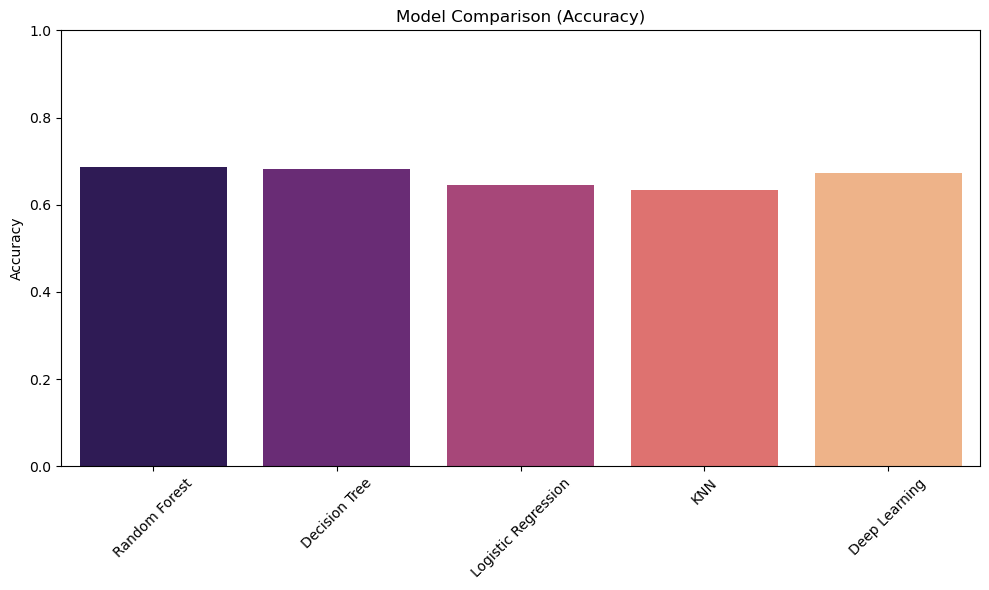


Classification Reports:

Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.89      0.70       895
           1       0.88      0.55      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.75      0.69      0.68      2200


Decision Tree:
              precision    recall  f1-score   support

           0       0.57      0.90      0.70       895
           1       0.88      0.53      0.67      1305

    accuracy                           0.68      2200
   macro avg       0.73      0.72      0.68      2200
weighted avg       0.75      0.68      0.68      2200


Logistic Regression:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset (replace 'E_Commerce.csv' with your file path)
df = pd.read_csv('E_Commerce.csv')

# Separate features and target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Identify categorical and numerical columns
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Convert sparse matrix to dense array if needed
if hasattr(X_preprocessed, 'toarray'):
    X_preprocessed = X_preprocessed.toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42)

# --- Traditional ML Models ---
print("Training traditional models...")

# Random Forest
rfc = RandomForestClassifier(criterion='gini', max_depth=8, 
                           min_samples_leaf=8, min_samples_split=2, 
                           random_state=42, n_jobs=1)  # Set n_jobs=1 to avoid parallel processing issues
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)

# Decision Tree
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, 
                           min_samples_leaf=6, min_samples_split=2, 
                           random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_pred)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# KNN
knn = KNeighborsClassifier(n_jobs=1)  # Set n_jobs=1 to avoid parallel processing issues
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# --- Deep Learning Model ---
print("\nTraining deep learning model...")

# Clear any existing TensorFlow sessions
tf.keras.backend.clear_session()

# Build model with proper input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Proper input layer
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate deep learning model
dl_loss, dl_accuracy = model.evaluate(X_test, y_test, verbose=0)
dl_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# --- Model Comparison ---
print("\nModel Accuracies:")
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN', 'Deep Learning']
accuracies = [rfc_accuracy, dtc_accuracy, lr_accuracy, knn_accuracy, dl_accuracy]

for model_name, acc in zip(models, accuracies):
    print(f"{model_name}: {acc:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='magma')
plt.title('Model Comparison (Accuracy)')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Print classification reports
print("\nClassification Reports:")
print("\nRandom Forest:")
print(classification_report(y_test, rfc_pred))

print("\nDecision Tree:")
print(classification_report(y_test, dtc_pred))

print("\nLogistic Regression:")
print(classification_report(y_test, lr_pred))

print("\nKNN:")
print(classification_report(y_test, knn_pred))

print("\nDeep Learning:")
print(classification_report(y_test, dl_pred))